In [14]:
#Data Loading and Initial Exploration

In [15]:
import pandas as pd

# Load the dataset
data = pd.read_csv('tips.csv')

# Display basic information about the dataset
print(data.info())
print(data.describe())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female

In [16]:
#Exploratory Data Analysis (EDA)

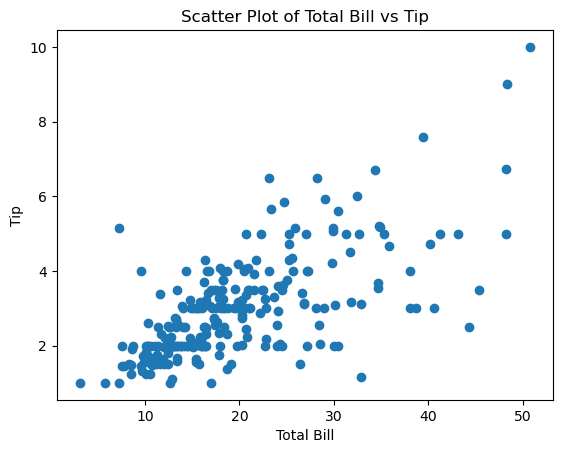

In [17]:
import matplotlib.pyplot as plt

# Scatter plot of 'total_bill' vs 'tip'
plt.scatter(data['total_bill'], data['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatter Plot of Total Bill vs Tip')
plt.show()


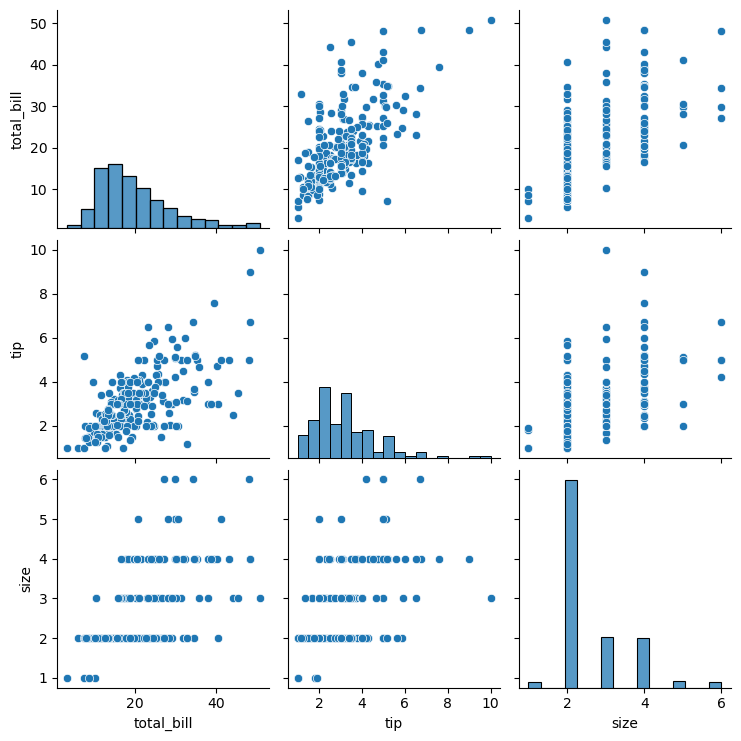

In [18]:
import seaborn as sns

# Pair plot to visualize relationships between all features
sns.pairplot(data)
plt.show()


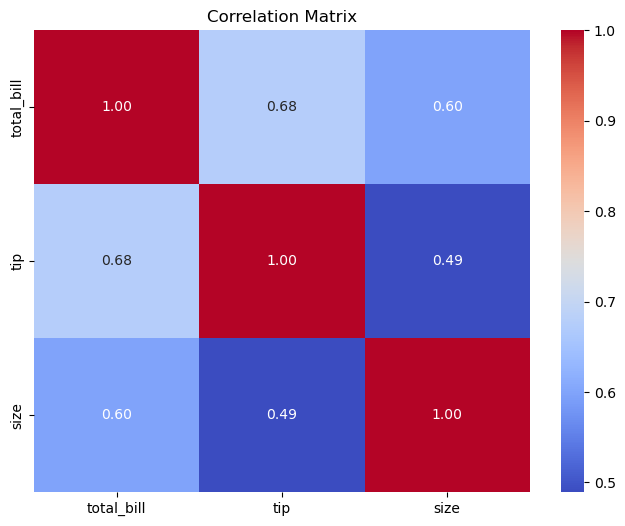

In [19]:
# Filter the dataset to include only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include='number')

# Plot the correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [20]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

# Perform Rainbow test for linearity
X = sm.add_constant(data['total_bill'])
model = sm.OLS(data['tip'], X).fit()
rainbow_stat, rainbow_p_val = linear_rainbow(model)
print("Rainbow test statistic:", rainbow_stat)
print("Rainbow test p-value:", rainbow_p_val)


Rainbow test statistic: 1.2291480226129026
Rainbow test p-value: 0.1291192152551375


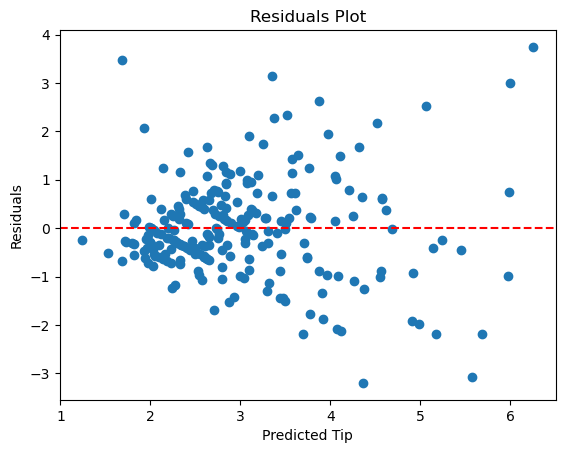

In [21]:
# Fit a simple linear regression model to obtain residuals
predictions = model.predict(X)
residuals = data['tip'] - predictions

# Residuals plot
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Tip')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


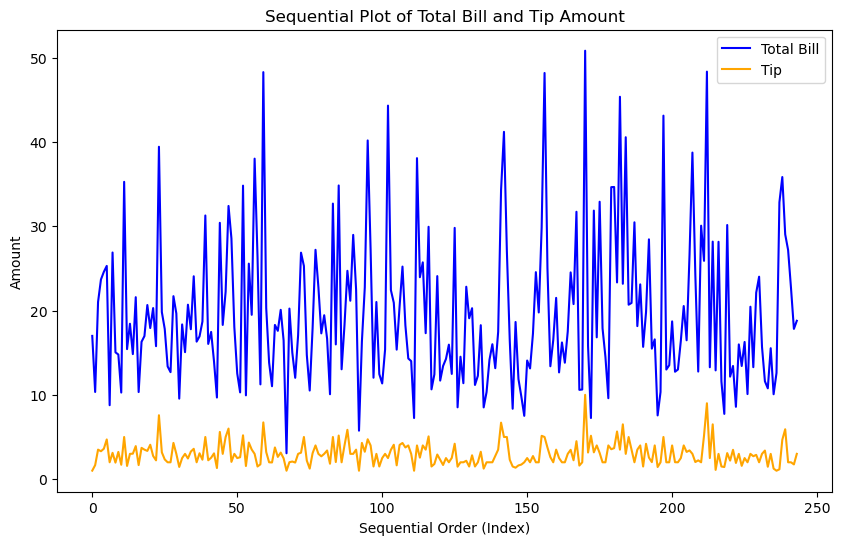

In [45]:
# Line plot for 'total_bill' and 'tip' over the sequential order of records
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['total_bill'], label='Total Bill', color='blue')
plt.plot(data.index, data['tip'], label='Tip', color='orange')
plt.xlabel('Sequential Order (Index)')
plt.ylabel('Amount')
plt.title('Sequential Plot of Total Bill and Tip Amount')
plt.legend()
plt.show()


In [22]:
#Model Selection and Training

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Splitting data into predictors and target variable
X = data[['total_bill', 'size']]  # Modify based on the available features in your dataset
y = data['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("\n")


Model: Linear Regression
MAE: 0.6639235737596481
MSE: 0.6485996190543516
R2 Score: 0.4811084097989492


Model: Ridge Regression
MAE: 0.6635062841685715
MSE: 0.6476315567917154
R2 Score: 0.48188287736278357


Model: Lasso Regression
MAE: 0.6256100264339348
MSE: 0.5665976098709373
R2 Score: 0.5467115210170848


Model: Decision Tree
MAE: 0.8226530612244899
MSE: 1.0133244897959186
R2 Score: 0.18932182435369105


Model: Random Forest
MAE: 0.7271789115646258
MSE: 0.786234512403629
R2 Score: 0.3709979709718584


Model: Support Vector Regression
MAE: 0.5606501260504805
MSE: 0.534741725522283
R2 Score: 0.5721968127152731


Model: K-Nearest Neighbors
MAE: 0.7211428571428571
MSE: 0.7436584489795918
R2 Score: 0.4050596025324963




In [24]:
#Identifying Significant Features

In [25]:
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso.fit(X_train, y_train)

# Display feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lasso.coef_
})
print(feature_importances)


      Feature  Importance
0  total_bill    0.099099
1        size    0.108081


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare data for linear regression
X = data[['total_bill', 'size']]  # Predictors; adjust based on observed patterns
y = data['tip']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Evaluate model accuracy
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Linear Regression Performance:
Mean Absolute Error (MAE): 0.6639235737596481
Mean Squared Error (MSE): 0.6485996190543516
R-squared (R2) Score: 0.4811084097989492


In [51]:
# Identifying Factors that Impact Tip Amounts

 #   Use Feature Importance Methods:
  #      Lasso Regression: Lasso regression is a form of linear regression with L1 regularization. 
    
   #  Random Forest Feature Importance: Random forest regression uses an ensemble of decision trees to rank features by how much they reduce model error. 
    #    This ranking helps identify the most critical factors.
#
 #   By comparing the results from Lasso and Random Forest, you can determine which factors 
#such as total bill, party size, time of day, and demographic details significantly impact the tip amounts.

In [ ]:
#Prediction Accuracy - Building and Evaluating Models

 #   Split Data into Training and Testing Sets: Dividing data into training and testing sets helps evaluate model performance on unseen data, 
#giving an unbiased measure of accuracy.

  #  Train Multiple Regression Models:
   #     Linear Regression: Good for identifying basic linear relationships.
    #   Decision Tree and Random Forest Regression: Excellent for capturing non-linear relationships and interactions between features.
     #   Support Vector Regression (SVR) and K-Nearest Neighbors (KNN): Suitable for capturing non-linear relationships in smaller datasets.

    #Evaluate Models Using Metrics:
     #   Mean Absolute Error (MAE): Measures the average magnitude of errors without considering their direction.
      #  Mean Squared Error (MSE): Penalizes larger errors more than MAE, useful when you want to emphasize accuracy on large outliers.
       # R² Score: Indicates the proportion of variance in the target variable explained by the model, 
#         with values closer to 1 suggesting better performance.

In [ ]:
Insights for Management

Based on the findings from Steps 1 and 2, provide actionable insights:

    Service Customization:
        If factors like time of day or customer demographics significantly influence tipping, tailor service strategies to enhance customer satisfaction in high-tipping demographics.

    Revenue Management:
        Use the model to predict high-tipping time slots and allocate resources effectively. For instance, if certain days or meal times see higher tipping, consider optimizing staffing and inventory accordingly.

    Targeted Promotions:
        Design promotional campaigns that appeal to high-tipping customers or encourage tipping-friendly behaviors. For example, offering personalized recommendations or special offers based on demographic data could enhance customer experience and encourage tipping.